<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/BootcampAlura_Modulo3_Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip", sep=";")
dados["datahora"] = pd.to_datetime(dados["datahora"])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   nome_munic     286178 non-null  object        
 1   codigo_ibge    286178 non-null  int64         
 2   dia            286178 non-null  int64         
 3   mes            286178 non-null  int64         
 4   datahora       286178 non-null  datetime64[ns]
 5   casos          286178 non-null  int64         
 6   casos_novos    286178 non-null  int64         
 7   casos_pc       286178 non-null  object        
 8   casos_mm7d     286178 non-null  object        
 9   obitos         286178 non-null  int64         
 10  obitos_novos   286178 non-null  int64         
 11  obitos_pc      286178 non-null  object        
 12  obitos_mm7d    286178 non-null  object        
 13  letalidade     286178 non-null  object        
 14  nome_ra        285735 non-null  object        
 15  

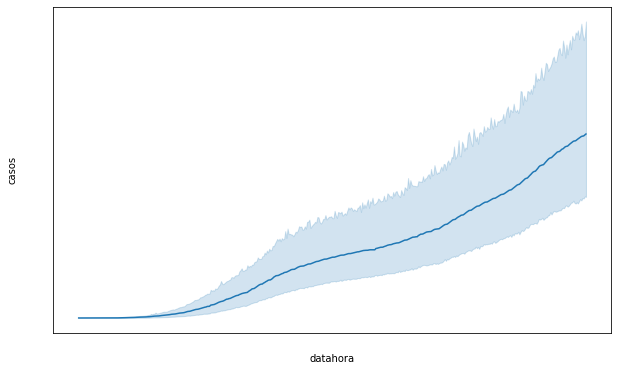

In [3]:
mpl.rcParams["figure.figsize"] =(10,6)
mpl.pyplot.rcParams['ytick.color'] = 'white'
mpl.pyplot.rcParams['xtick.color'] = 'white'
sns.lineplot(x="datahora", y="casos", data=dados)

In [4]:
dados_sp = dados.loc[dados["nome_munic"] == "São Paulo"].copy()
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9


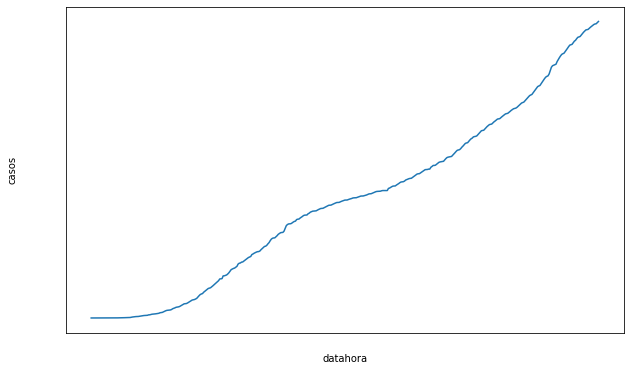

In [5]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)

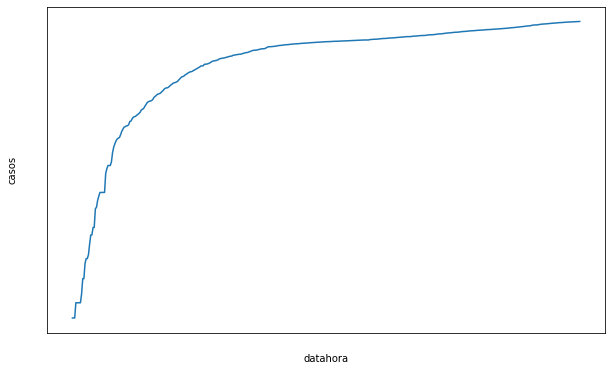

In [6]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

In [7]:
dados_campinas = dados.loc[dados["nome_munic"] == "Campinas"]

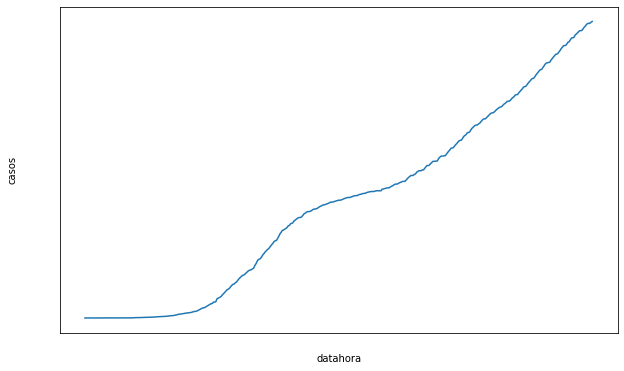

In [8]:
sns.lineplot(x="datahora", y="casos", data=dados_campinas)

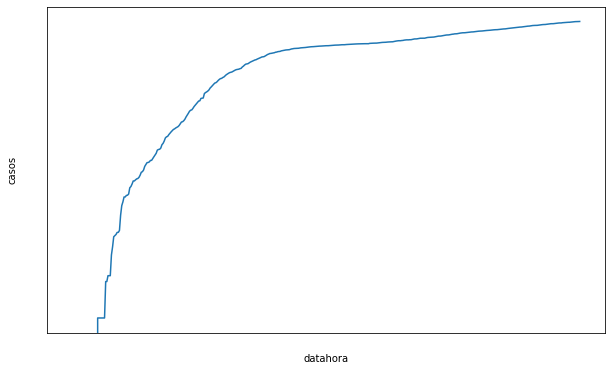

In [9]:
sns.lineplot(x="datahora", y="casos", data=dados_campinas)
mpl.pyplot.yscale("log")

In [10]:
dados_indaiatuba = dados.loc[dados["nome_munic"] == "Indaiatuba"]

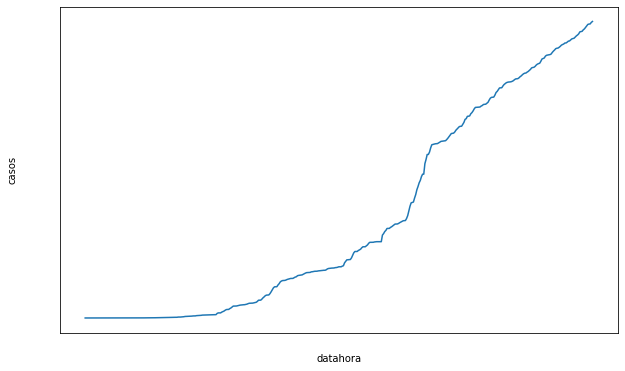

In [11]:
mpl.pyplot.figure(figsize=(10,6))
sns.lineplot(x="datahora", y="casos", data=dados_indaiatuba)

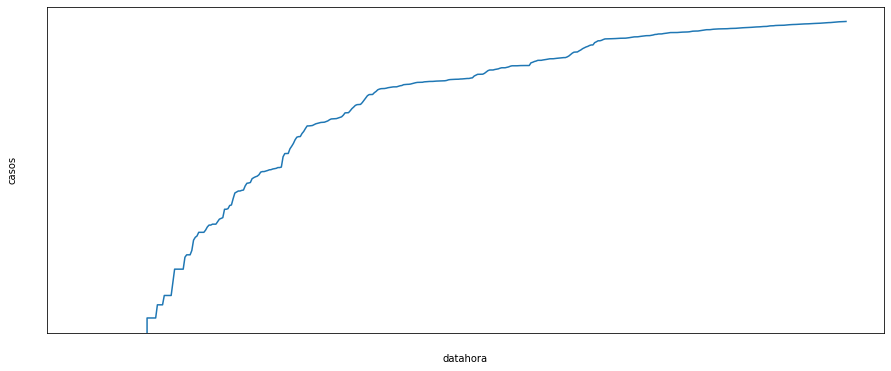

In [12]:
mpl.pyplot.figure(figsize=(15,6))
sns.lineplot(x="datahora", y="casos", data=dados_indaiatuba)
mpl.pyplot.yscale("log")

In [13]:
dados_sp["taxa_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_crescimento_obitos"] = dados_sp["obitos_novos"].diff()

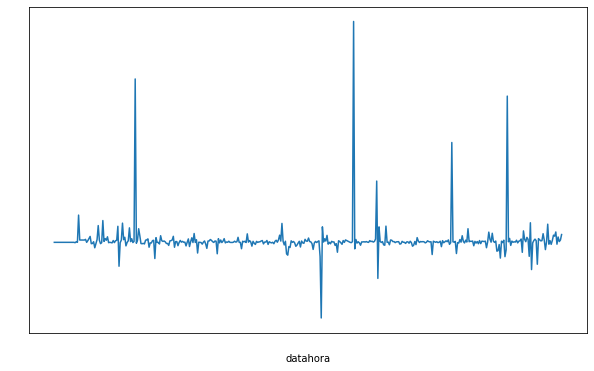

In [14]:
sns.lineplot(x="datahora",y=(dados_sp["taxa_crescimento_obitos"]/dados_sp["taxa_crescimento_casos"]), data=dados_sp)

In [15]:
dados_sp["ano"] = dados_sp["datahora"].dt.year
dados_sp["mes"] = dados_sp["datahora"].dt.month
dados_sp["dia"] = dados_sp["datahora"].dt.day

In [16]:
plotar = dados_sp.query("ano == 2021")

In [99]:
num_linhas = plotar["datahora"].count()
valores=[]
for i in np.arange(1,num_linhas, step=10):
  valores = valores + ["{}/{}".format(plotar["datahora"].dt.day.iloc[i], plotar["datahora"].dt.month.iloc[i])]


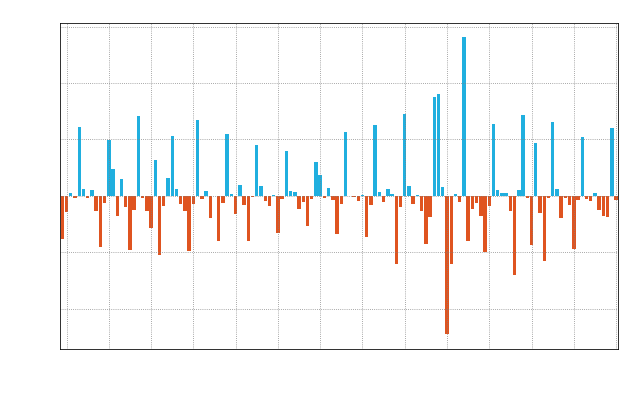

In [128]:
ax = sns.barplot(x="datahora", y ="taxa_crescimento_casos", data=plotar, 
                 palette=(plotar["taxa_crescimento_casos"]>0).map({True: "deepskyblue",
                                                                   False: "orangered"}))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.1f}".format(x/1)))
ylabels = ['{:,.3f}'.format(x) for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)
plt.xticks(np.arange(1,num_linhas, step=10), rotation=45, labels=valores)
plt.xlabel("dia/mês", fontweight="bold", color="white")
plt.ylabel("Crescimento de Casos", fontweight="bold", color="white")
plt.title("Taxa de crescimento da casos de COVID-19 na cidade de São Paulo", fontweight="bold", color="white")
plt.grid(linestyle=":", color="grey")

In [18]:
dados_sp["media_movel_casos"] = dados_sp["casos_novos"].rolling(window=7,center=False).mean()
dados_sp["media_movel_obitos"] = dados_sp["obitos_novos"].rolling(window=7,center=False).mean()

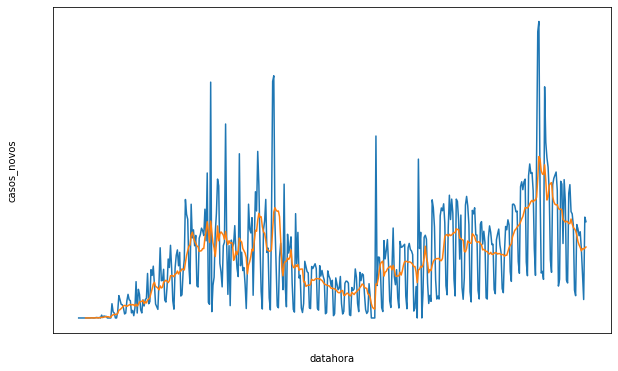

In [19]:
sns.lineplot(data=dados_sp, x="datahora", y="casos_novos")
sns.lineplot(data=dados_sp, x="datahora", y="media_movel_casos")

<BarContainer object of 443 artists>

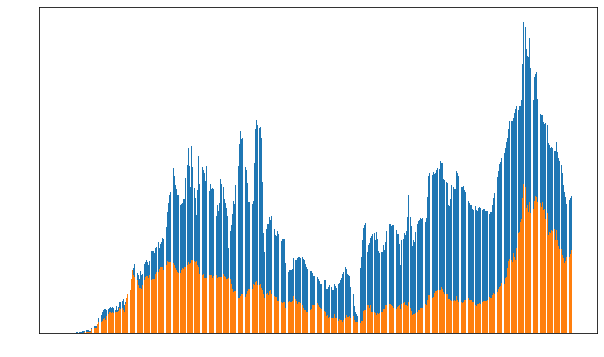

In [20]:
plt.bar(dados_sp["datahora"], dados_sp["media_movel_casos"])
plt.bar(dados_sp["datahora"], dados_sp["media_movel_obitos"]*10)